In [2]:
from mumax_helper import *
from scipy.signal import find_peaks 

In [4]:
from os import remove
from glob import glob 

In [6]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 5e9        # maximum frequency (in Hz) of the sinc pulse
T    = 50e-9        # simulation time (longer -> better frequency resolution)
dt = 1/(2*fmax)  # the sample time (Nyquist theorem taken into account)
side_length = 300e-9 # diameter of the circle domain
fdrive = 750e8


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(field, freq):

    script = f"""
    side := {side_length}
    nx   := 128
    setgridsize(200,300,1)
    setcellsize(1e-9,1e-9,1e-9)

    domain := square(300e-9)
    corner1 := rect(150e-9,300e-9).transl(150e-9,0,0).rotz(pi/6)
    corner2 := rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(-pi/6)
    corner3 :=  rect(150e-9,300e-9).transl(150e-9,0,0).rotz(7/6*pi)
    corner4 :=  rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(5/6*pi)

    setgeom(domain.sub(corner1).sub(corner2).sub(corner3).sub(corner4))

    Msat = 1e6
    Aex = 10e-12
    Dind = 2.2e-3
    Ku1 = 1e6
    AnisU = vector(0,0,1)
    alpha = 0.001

    t0 := 1/({fmax})
    B_ext = vector(0, 0, {field} * sinc( 2*pi*{freq}*(t-t0))) 
    // B_ext = vector(0, 0, {field} * sin( 2*pi*{freq}*t)) 

    dia := 30e-9
    sep := 50e-9
    shape_1 := circle(dia).transl(0, sep, 0)
    shape_2 := circle(dia).transl(0, -sep, 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl(0, sep, 0 ))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(0, -sep, 0 ))

    minimize()
    autosave(m,{dt})
    tableautosave({dt})
    run({T})
    """


    return script


table1, fields1 = run_mumax3(resonance_script(.0001, fmax),
                             "Diamond Vertical Excite")


In [7]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 5e9        # maximum frequency (in Hz) of the sinc pulse
T    = 50e-9        # simulation time (longer -> better frequency resolution)
dt = 1/(2*fmax)  # the sample time (Nyquist theorem taken into account)
side_length = 300e-9 # diameter of the circle domain
fLow = 1.98e9
fHigh = 3.11e9


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(field,freq):

    script = f"""
    side := {side_length}
    nx   := 128
    setgridsize(200,300,1)
    setcellsize(1e-9,1e-9,1e-9)

    domain := square(300e-9)
    corner1 := rect(150e-9,300e-9).transl(150e-9,0,0).rotz(pi/6)
    corner2 := rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(-pi/6)
    corner3 :=  rect(150e-9,300e-9).transl(150e-9,0,0).rotz(7/6*pi)
    corner4 :=  rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(5/6*pi)

    setgeom(domain.sub(corner1).sub(corner2).sub(corner3).sub(corner4))

    Msat = 1e6
    Aex = 10e-12
    Dind = 2.2e-3
    Ku1 = 1e6
    AnisU = vector(0,0,1)
    alpha = 0.001

    t0 := 1/({fmax})
    B_ext = vector(0, 0, {field} * sinc( 2*pi*{freq}*(t-t0))) 
    // B_ext = vector(0, 0, {field} * sin( 2*pi*{freq}*t)) 

    dia := 30e-9
    sep := 50e-9
    shape_1 := circle(dia).transl(sep, 0, 0)
    shape_2 := circle(dia).transl(-sep, 0, 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl(sep, 0, 0 ))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(-sep, 0, 0 ))

    minimize()
    autosave(m,{dt})
    tableautosave({dt})
    run({T})
    """


    return script


# for Bfield in np.linspace(.0023,.0038,5):

#     name = "Threshold study low " + str(Bfield)

table2, fields2 = run_mumax3(resonance_script(.0001, fmax),
                          "Diamond Horizontal Excite")


In [5]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 5e9        # maximum frequency (in Hz) of the sinc pulse
T    = 50e-9        # simulation time (longer -> better frequency resolution)
dt = 1/(2*fmax)  # the sample time (Nyquist theorem taken into account)
side_length = 300e-9 # diameter of the circle domain
fLow = 1.98e9
fHigh = 3.11e9


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script():

    script = f"""
    side := {side_length}
    nx   := 128
    setgridsize(200,300,1)
    setcellsize(1e-9,1e-9,1e-9)

    domain := square(300e-9)
    corner1 := rect(150e-9,300e-9).transl(150e-9,0,0).rotz(pi/6)
    corner2 := rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(-pi/6)
    corner3 :=  rect(150e-9,300e-9).transl(150e-9,0,0).rotz(7/6*pi)
    corner4 :=  rect(150e-9,300e-9).transl(-150e-9,0,0).rotz(5/6*pi)

    setgeom(domain.sub(corner1).sub(corner2).sub(corner3).sub(corner4))

    Msat = 1e6
    Aex = 10e-12
    Dind = 2.2e-3
    Ku1 = 1e6
    AnisU = vector(0,0,1)
    alpha = 0.001

    t0 := 1/({fmax})
    B_ext = vector(0, 0, .005 * sin( 2*pi*5e9*t)) 

    dia := 30e-9
    sep := 50e-9
    shape_1 := circle(dia).transl(sep, 0, 0)
    shape_2 := circle(dia).transl(-sep, 0, 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl(sep, 0, 0 ))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(-sep, 0, 0 ))

    minimize()
    autosave(m,{dt})
    tableautosave({dt})
    run(2e-9)
    B_ext = vector(0, 0, 0)
    run(20e-9)
    """


    return script


table3, fields3 = run_mumax3(resonance_script(), "Mode Change")


In [7]:
table1.

,t,mx,my,mz,B_extx,B_exty,B_extz
0,0.000000e+00,0.000012,0.000044,0.651726,0,0,-1.949086e-19
1,1.263179e-11,0.000009,0.000032,0.626700,0,0,5.326694e-05
2,2.514480e-11,0.000019,0.000053,0.568029,0,0,4.998896e-03
3,3.769864e-11,0.000005,0.000029,0.492579,0,0,-7.817891e-05
4,5.014419e-11,0.000104,-0.000019,0.424022,0,0,2.866589e-05
...,...,...,...,...,...,...,...
795,9.937760e-09,-0.000140,-0.000080,0.497179,0,0,-1.311015e-07
796,9.950265e-09,-0.000139,-0.000077,0.497281,0,0,1.334593e-07
797,9.962506e-09,-0.000142,-0.000076,0.496760,0,0,-3.001371e-09
798,9.975015e-09,-0.000144,-0.000081,0.495784,0,0,7.660534e-09


In [6]:

table1 = read_mumax3_table(r"C:\Users\Dreycen Foiles\OneDrive - University of Illinois - Urbana\Research\Calculations\Pentagonal Lattice\table.txt");
table1.to_csv("table.csv")

Peak frequencies: [6.02409639e+07 1.76706827e+09 1.82730924e+09]


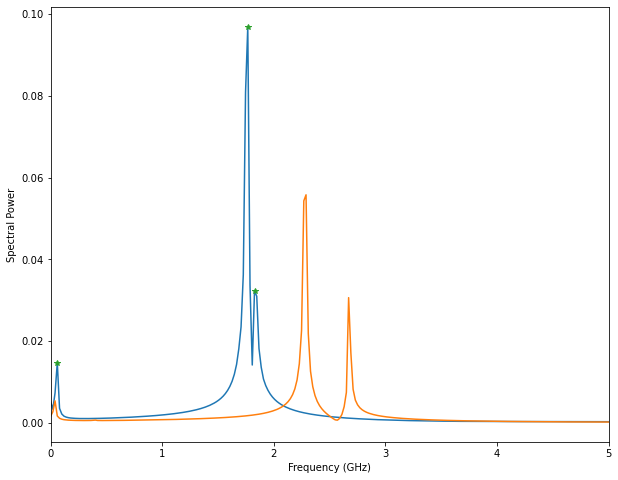

In [11]:
# fmax = 30e9

# table1 = read_mumax3_table(r"C:\Users\foile\Documents\Calculations\Skyrmion resonances\Diamond Vertical.out\table.txt")
# table2 = read_mumax3_table(r"C:\Users\foile\Documents\Calculations\Skyrmion resonances\Diamond.out\table.txt")


dm1 = table1["mz"] - np.median(table1["mz"])
dm2 = table2["mz"] - np.median(table2["mz"])

spectr1 = np.abs(np.fft.fft(dm1))
spectr2 = np.abs(np.fft.fft(dm2))

real_spectr1 = spectr1[:int(np.ceil(len(spectr1)/2))]
real_spectr2 = spectr2[:int(np.ceil(len(spectr2)/2))]
freq = np.linspace(0, fmax, len(real_spectr1))

plt.figure(figsize=(10, 8))

plt.plot(freq/1e9, real_spectr1)
plt.plot(freq/1e9, real_spectr2)
peak_locations = find_peaks(real_spectr1, prominence=.01)[0]
peak_freqs = freq[peak_locations]
print("Peak frequencies:", peak_freqs)
peak_spectra = spectr1[peak_locations]
plt.plot(peak_freqs/1e9, peak_spectra, '*')
plt.xlim(0, 5)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Power')
plt.show()


In [22]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 30e9        # maximum frequency (in Hz) of the sinc pulse
T    = 200e-9        # simulation time (longer -> better frequency resolution)
dt = 1/(2*fmax)  # the sample time (Nyquist theorem taken into account)
diameter = 70e-9 # diameter of the circle domain
fdrive = 1e6


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(separation):

    script = f"""
    diam := {diameter}
    nx   := 96
    setgridsize(nx,nx,1)
    setcellsize(diam/nx,diam/nx,1e-9)
    setgeom(circle(diam))

    Msat = 1e6
    Aex = 25e-12
    Dind = 3e-3
    Ku1 = 1e6
    AnisU = vector(0,0,1)
    alpha = 0.001

    B_ext = vector(0, 0, 0.05 * sinc( 2*pi*{fmax}*t))

    dia := 40e-9
    sep := {separation}
    shape_1 := circle(dia).transl(sep/sqrt(2), sep/sqrt(2), 0)
    shape_2 := circle(dia).transl(-sep/sqrt(2), -sep/sqrt(2), 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl(sep/sqrt(2), sep/sqrt(2), 0))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(-sep/sqrt(2), -sep/sqrt(2), 0))

    minimize()
    autosave(m,{dt})
    tableautosave({dt})
    run({T})
    """


    return script

table1, fields1 = run_mumax3(resonance_script(11e-9), "two diagonal skyrmions excited")


In [3]:
# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 10e9        # maximum frequency (in Hz) of the sinc pulse
T    = 20e-9        # simulation time (longer -> better frequency resolution)  # the sample time (Nyquist theorem taken into account)
diameter = 300e-9 # diameter of the circle domain


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(separation,angle,freq,drive=1):

    freq_temp = 10e9
    dt = 1/(2*freq_temp)

    theta = np.deg2rad(angle)
    x_pos = separation*np.cos(theta)
    y_pos = separation*np.sin(theta) 

    script = f"""
    diam := {diameter}
    nx := 128
    setgridsize(nx, nx, 1)
    setcellsize(diam/nx, diam/nx, 1e-9)
    setgeom(circle(diam))

    Msat = 1e6
    Aex = 10e-12
    Dind = 2.2e-3
    Ku1 = 1e6
    AnisU = vector(0, 0, 1)
    alpha = 0.001

    if {drive} == 1 {{
        B_ext = vector(0, 0, 0.05 * sin( 2*pi*{freq}*t))
    }} else{{
         B_ext = vector(0, 0, 0.01 * sinc( 2*pi*{freq}*t))
     }}
    

    dia := 120e-9
    sep := {separation}
    shape_1 := circle(dia).transl({x_pos}, {y_pos}, 0)
    shape_2 := circle(dia).transl(-{x_pos}, -{y_pos}, 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl({x_pos}, {y_pos}, 0))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(-{x_pos}, -{y_pos}, 0))
    minimize()
    autosave(m, {dt})
    tableautosave({dt})
    run({T})
    """


    return script

table1, fields1 = run_mumax3(resonance_script(50e-9,0,fmax,drive=0), "two horizontal skyrmions excited")
table2, fields2 = run_mumax3(resonance_script(50e-9,45,fmax,drive=0), "two diagonal skyrmions excited")
table3, fields3 = run_mumax3(resonance_script(50e-9,90,fmax,drive=0), "two vertical skyrmions excited")


In [4]:
## SQUARE DOMAIN

# NUMERICAL PARAMETERS RELEVANT FOR THE SPECTRUM ANALYSIS
fmax = 10e9        # maximum frequency (in Hz) of the sinc pulse
T    = 20e-9        # simulation time (longer -> better frequency resolution)  # the sample time (Nyquist theorem taken into account)
side = 300e-9 # diameter of the circle domain


# Note that this is a format string, this means that the statements inside the
# curly brackets get evaluated by python. In this way, we insert the values of
# the variables above in the script.

def resonance_script(separation,angle,freq,drive=1):

    freq_temp = 10e9
    dt = 1/(2*freq_temp)

    theta = np.deg2rad(angle)
    x_pos = separation*np.cos(theta)
    y_pos = separation*np.sin(theta) 

    script = f"""
    side := {side}
    nx := 128
    setgridsize(nx, nx, 1)
    setcellsize(side/nx, side/nx, 1e-9)
    setgeom(rect(side,side))

    Msat = 1e6
    Aex = 10e-12
    Dind = 2.2e-3
    Ku1 = 1e6
    AnisU = vector(0, 0, 1)
    alpha = 0.001

    if {drive} == 1 {{
        B_ext = vector(0, 0, 0.05 * sin( 2*pi*{freq}*t))
    }} else{{
         B_ext = vector(0, 0, 0.01 * sinc( 2*pi*{freq}*t))
     }}
    

    dia := 120e-9
    sep := {separation}
    shape_1 := circle(dia).transl({x_pos}, {y_pos}, 0)
    shape_2 := circle(dia).transl(-{x_pos}, -{y_pos}, 0)

    m = Uniform(0, 0, 1)
    m.setInShape(shape_1, NeelSkyrmion(1, -1).transl({x_pos}, {y_pos}, 0))
    m.setInShape(shape_2, NeelSkyrmion(1, -1).transl(-{x_pos}, -{y_pos}, 0))
    minimize()
    autosave(m, {dt})
    tableautosave({dt})
    run({T})
    """


    return script

table1, fields1 = run_mumax3(resonance_script(50e-9,0,fmax,drive=0), "two horizontal skyrmions excited square")
table2, fields2 = run_mumax3(resonance_script(50e-9,45,fmax,drive=0), "two diagonal skyrmions excited square")
table3, fields3 = run_mumax3(resonance_script(50e-9,90,fmax,drive=0), "two vertical skyrmions excited square")


Peak frequencies: [1.20048019e+07 2.52100840e+08 9.48379352e+08 1.16446579e+09
 1.21248499e+09]


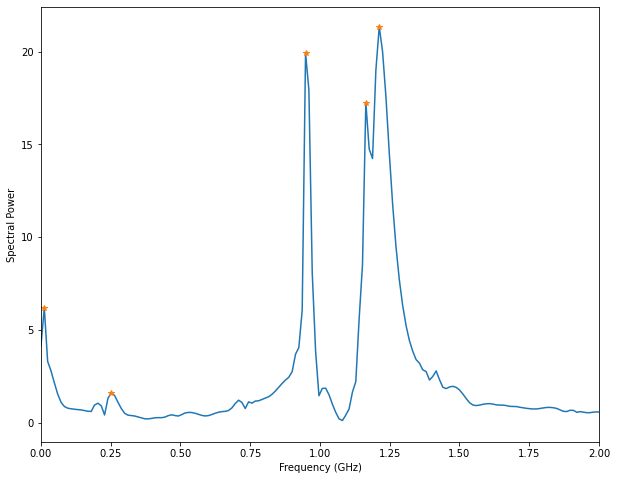

In [50]:
dm1 = table1["mz"] - np.median(table1["mz"])
dm2 = table2["mz"] - np.median(table2["mz"])
dm3 = table3["mz"] - np.median(table3["mz"])

spectr1 = np.abs(np.fft.fft(dm1))
spectr2 = np.abs(np.fft.fft(dm2))
spectr3 = np.abs(np.fft.fft(dm3))

real_spectr = spectr1[:int(np.ceil(len(spectr1)/2))]
freq = np.linspace(0, fmax, len(real_spectr))

plt.figure(figsize=(10,8))

plt.plot(freq/1e9,real_spectr)
peak_locations = find_peaks(real_spectr,prominence=.5)[0]
peak_freqs = freq[peak_locations]
print("Peak frequencies:",peak_freqs)
peak_spectra = spectr1[peak_locations]
plt.plot(peak_freqs/1e9,peak_spectra,'*')
plt.xlim(0, 2)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Power')
plt.show()


In [51]:
peak_freqs

array([1.20048019e+07, 2.52100840e+08, 9.48379352e+08, 1.16446579e+09,
       1.21248499e+09])

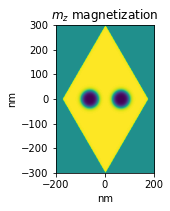

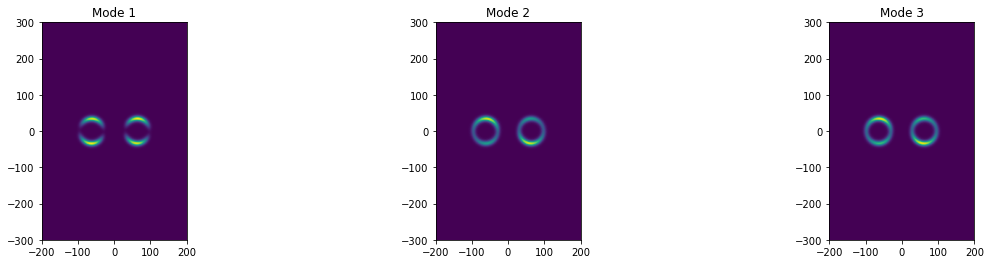

In [13]:
# Stack all snapshots (4D arrays) of the magnetization on top of each other
# The results in a single 5D array (first index is the snapshot index)
m = np.stack([fields2[key] for key in sorted(fields2.keys())])

# Select the z component and the (only) layer z=0
mz = m[:,2,0,:,:]

# Apply the FFT for every cell
mz_fft = np.fft.fft(mz, axis=0)


# Plot the result
num_images = len(peak_locations + 1)

plt.figure()
plt.subplot(1,num_images,1)
plt.title("$m_z$ magnetization")
plt.imshow(mz[0],extent=[-200,200,-300,300])
plt.xlabel('nm')
plt.ylabel('nm')

plt.figure(figsize=(20,4))

for peak in enumerate(peak_locations):
    peak_count = peak[0] + 1
    peak_idx = peak[1]
    mode = mz_fft[peak_idx]
    plt.subplot(1,num_images,peak_count)
    plt.imshow(np.abs(mode)**2,extent=[-200,200,-300,300])
    plt.title("Mode " + str(peak_count))


plt.show()

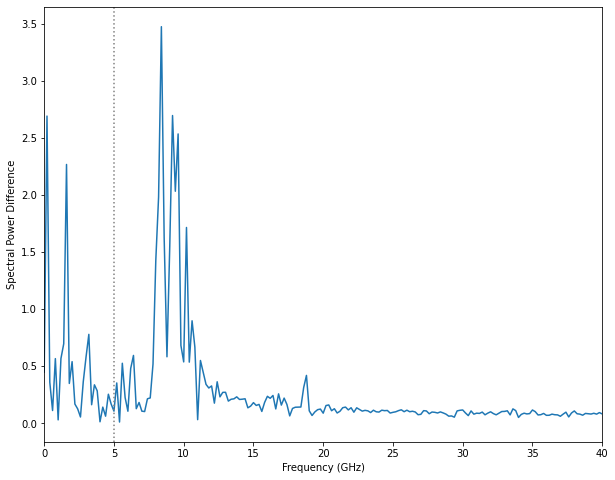

In [435]:
dm1 = table3["mz"] - np.median(table3["mz"])
dm2 = table2["mz"] - np.median(table2["mz"])
spectr1 = np.abs(np.fft.fft(dm1)) - np.abs(np.fft.fft(dm2)) 

real_spectr = spectr1[:int(np.ceil(len(spectr1)/2))]
freq = np.linspace(0, fmax, len(real_spectr))

plt.figure(figsize=(10,8))

plt.plot(freq/1e9,abs(real_spectr))
peak_locations = find_peaks(real_spectr,prominence=.8)[0]
peak_freqs = freq[peak_locations]
peak_spectra = spectr1[peak_locations]
# plt.plot(peak_freqs/1e9,peak_spectra,'*')
plt.axvline(Resonance/1e9,linestyle='dotted',color='gray')
plt.xlim(0, fmax/1e9)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Power Difference')
plt.show()


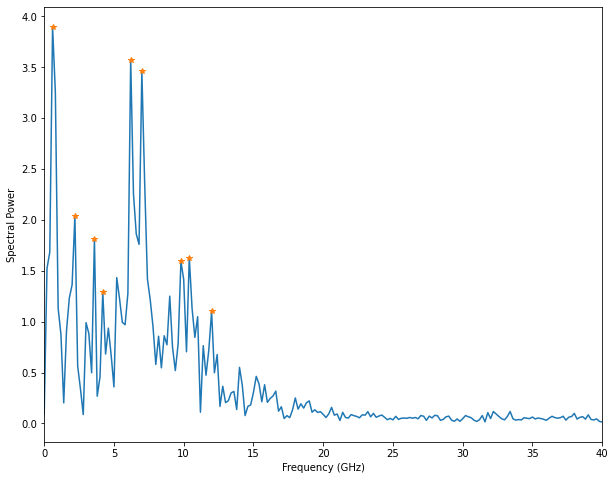

In [412]:
dm1 = table3["mz"] - np.median(table3["mz"])
spectr1 = np.abs(np.fft.fft(dm1))

real_spectr = spectr1[:int(np.ceil(len(spectr1)/2))]
freq = np.linspace(0, fmax, len(real_spectr))

plt.figure(figsize=(10,8))

plt.plot(freq/1e9,real_spectr)
peak_locations = find_peaks(real_spectr,prominence=.8)[0]
peak_freqs = freq[peak_locations]
peak_spectra = spectr1[peak_locations]
plt.plot(peak_freqs/1e9,peak_spectra,'*')
plt.xlim(0, fmax/1e9)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Power')
plt.show()


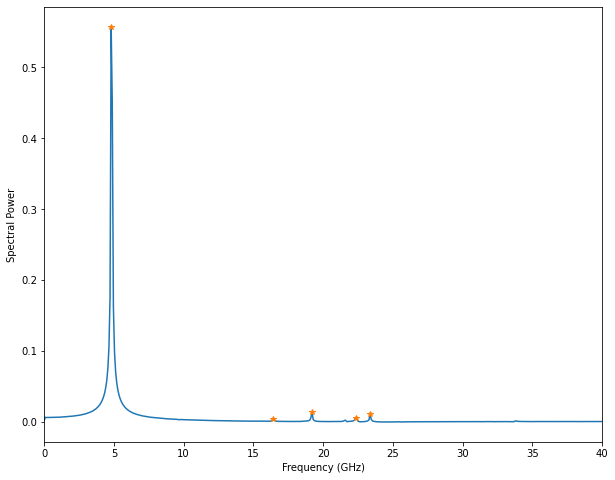

In [430]:
dm1 = table1["mz"] - np.median(table1["mz"])
spectr1 = np.abs(np.fft.fft(dm1))

real_spectr = spectr1[:int(np.ceil(len(spectr1)/2))]
freq = np.linspace(0, fmax, len(real_spectr))

plt.figure(figsize=(10,8))

plt.plot(freq/1e9,real_spectr)
peak_locations = find_peaks(real_spectr,prominence=.003)[0]
peak_freqs = freq[peak_locations]
peak_spectra = spectr1[peak_locations]
plt.plot(peak_freqs/1e9,peak_spectra,'*')
plt.xlim(0, fmax/1e9)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Spectral Power')
plt.show()


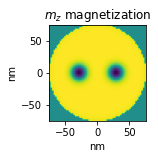

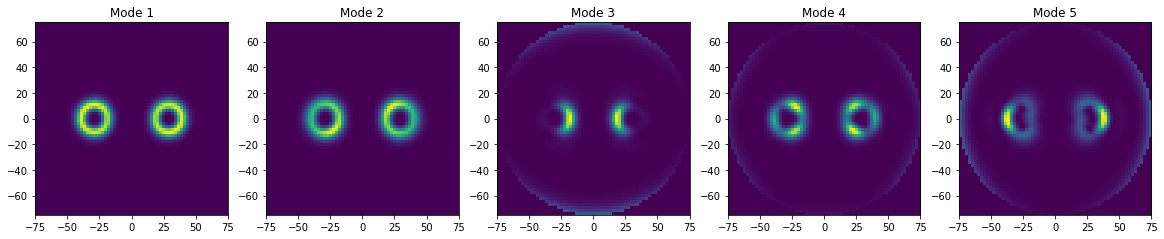

In [431]:
# Stack all snapshots (4D arrays) of the magnetization on top of each other
# The results in a single 5D array (first index is the snapshot index)
m = np.stack([fields1[key] for key in sorted(fields1.keys())])

# Select the z component and the (only) layer z=0
mz = m[:,2,0,:,:]

# Apply the FFT for every cell
mz_fft = np.fft.fft(mz, axis=0)


# Plot the result
num_images = len(peak_locations + 1)

plt.figure(figsize=(10,4))
plt.subplot(1,num_images,1)
plt.title("$m_z$ magnetization")
plt.imshow(mz[0],extent=[-75,75,-75,75])
plt.xlabel('nm')
plt.ylabel('nm')

plt.figure(figsize=(20,4))

for peak in enumerate(peak_locations):
    peak_count = peak[0] + 1
    peak_idx = peak[1]
    mode = mz_fft[peak_idx]
    plt.subplot(1,num_images,peak_count)
    plt.imshow(np.abs(mode)**2,extent=[-75,75,-75,75])
    plt.title("Mode " + str(peak_count))


plt.show()